#### Step 1: Importing the Relevant Libraries

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#### Step 2: Data Inspection

In [19]:
df_train=pd.read_csv(r'C:/Users/INTEL/Desktop/AV/TRAIN.csv')
df_train.shape

(188340, 10)

In [20]:
df_test=pd.read_csv(r'C:/Users/INTEL/Desktop/AV/TEST_FINAL.csv')
df_test.shape

(22265, 8)

In [21]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [22]:
df_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [24]:
df_train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [25]:
df_test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [26]:
#categorical features
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 4


In [27]:
#categorical features
categorical = df_test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= df_test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 2


In [29]:
df_train.describe(include='all')

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,516,NaN,2,NaN,NaN
top,T1005022,NaN,S1,L1,R1,2019-03-21,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,365,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,NaN,0.131783,NaN,68.205692,42784.327982
std,NaN,105.366308,NaN,NaN,NaN,NaN,0.338256,NaN,30.467415,18456.708302
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,NaN,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,NaN,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,NaN,0.000000,NaN,82.000000,51909.000000


#### Step 3 : EDA

#### Q1 : Which store has the highest sales?

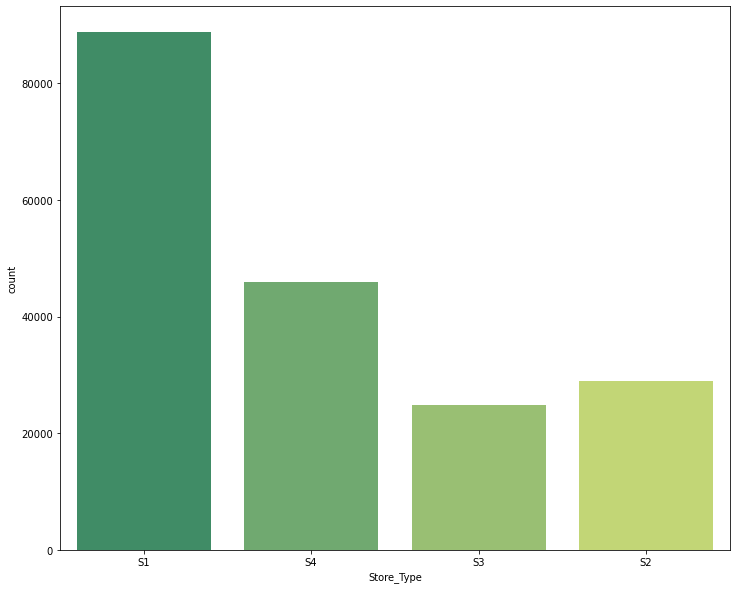

In [30]:
plt.figure(figsize=(12,10))
sns.countplot('Store_Type',data=df_train,palette='summer')

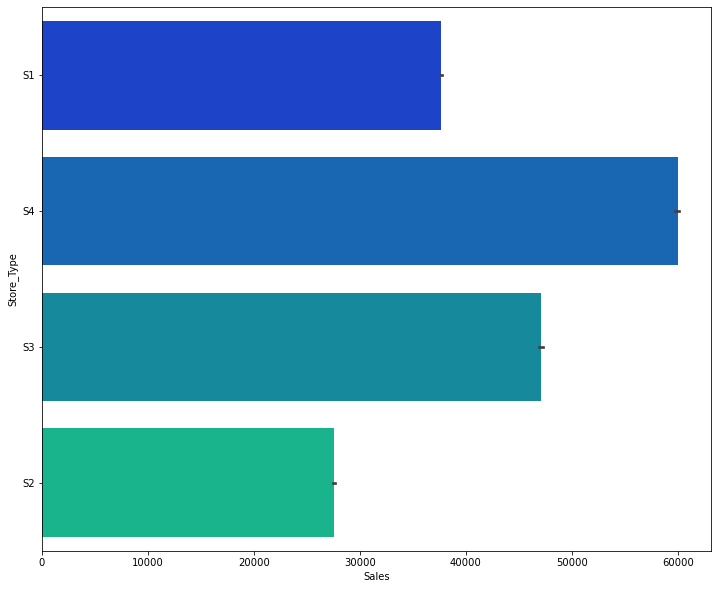

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(x='Sales', y='Store_Type',data=df_train,palette='winter')

Store **S4** has the highest sales 

**Q2: Is hoilday a good season for sales?**

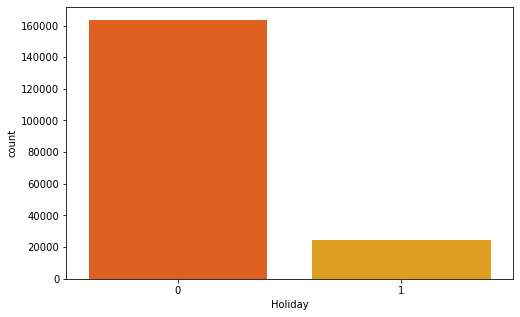

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('Holiday',data=df_train,palette='autumn')

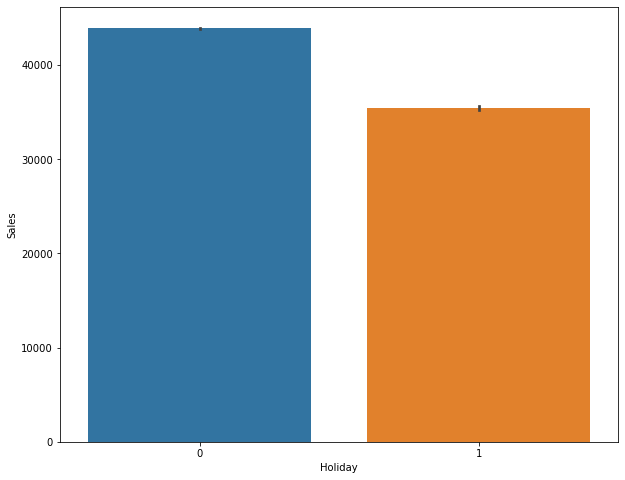

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(y='Sales',x='Holiday',data=df_train)

**Holiday is not a good season for sales**

**Q3:Which location has seen an average number of sales?**

In [39]:
avg_sales = df_train.pivot_table(index='Location_Type', values='Sales', aggfunc='mean')
avg_sales

,Sales
Location_Type,
L1,41453.597889
L2,59231.480373
L3,33072.257756
L4,29067.414313
L5,25187.787261


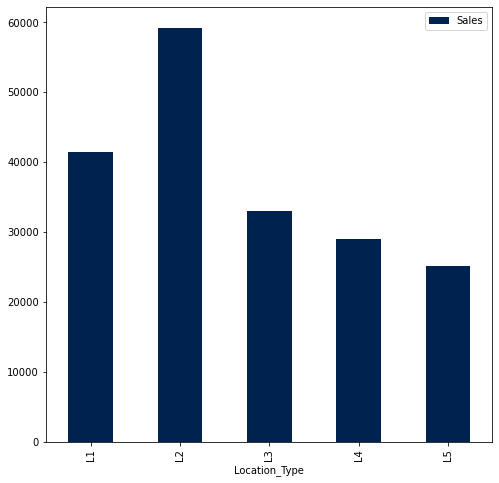

In [40]:
avg_sales.plot(kind='bar',figsize=(8,8), cmap='cividis')

**L2** Location has seen an average number of Sales

**Q4: After discount, has the sales increases?**


In [41]:
discount_sales = df_train.pivot_table(index='Discount', values='Sales', aggfunc='sum')
discount_sales

,Sales
Discount,
No,3.891890e+09
Yes,4.166110e+09


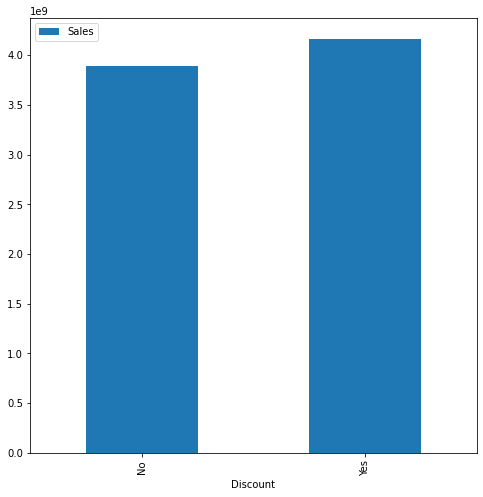

In [43]:
discount_sales.plot(kind='bar',figsize=(8,8))

In [90]:
x=df_train.corr()
x

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,1.000000e+00,-5.007475e-06,6.289893e-06,-4.330585e-08,-3.919360e-06,9.999981e-01,2.588586e-02,-0.028783,0.022239,0.005269
Store_id,-5.007475e-06,1.000000e+00,8.627203e-02,6.729649e-02,-1.252935e-01,0.000000e+00,-4.477583e-19,-0.000693,0.028290,0.004377
Store_Type,6.289893e-06,8.627203e-02,1.000000e+00,-1.009121e-01,-2.438844e-01,6.581785e-18,5.584485e-17,0.002121,0.583800,0.492471
Location_Type,-4.330585e-08,6.729649e-02,-1.009121e-01,1.000000e+00,-7.198033e-02,8.476336e-18,-3.105675e-17,0.000419,-0.248567,-0.283771
Region_Code,-3.919360e-06,-1.252935e-01,-2.438844e-01,-7.198033e-02,1.000000e+00,3.207339e-18,-4.138573e-17,0.000147,-0.235614,-0.121003
Date,9.999981e-01,0.000000e+00,6.581785e-18,8.476336e-18,3.207339e-18,1.000000e+00,2.588590e-02,-0.028784,0.022234,0.005266
Holiday,2.588586e-02,-4.477583e-19,5.584485e-17,-3.105675e-17,-4.138573e-17,2.588590e-02,1.000000e+00,0.019545,-0.140496,-0.154779
Discount,-2.878273e-02,-6.928774e-04,2.121497e-03,4.190224e-04,1.471481e-04,-2.878382e-02,1.954527e-02,1.000000,0.233374,0.323906
#Order,2.223880e-02,2.828985e-02,5.838000e-01,-2.485666e-01,-2.356142e-01,2.223427e-02,-1.404963e-01,0.233374,1.000000,0.941601
Sales,5.268944e-03,4.376631e-03,4.924707e-01,-2.837714e-01,-1.210026e-01,5.265972e-03,-1.547788e-01,0.323906,0.941601,1.000000


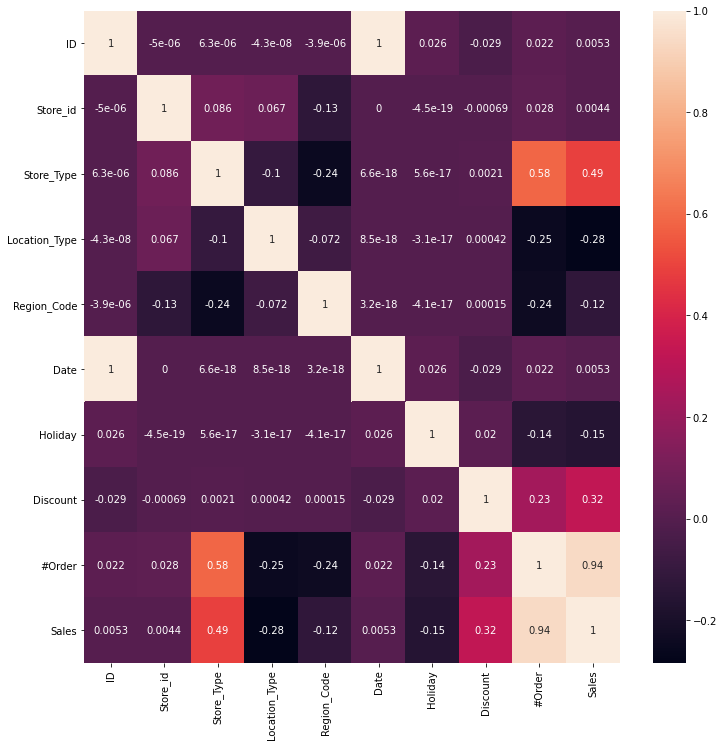

In [91]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(), annot = True)

#### Step 4 Building Model

In [45]:
df_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [46]:
# Labelencoding
le = LabelEncoder()
var_mod = df_train.select_dtypes(include='object').columns
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])
    
for i in var_mod:
   df_test[i] = le.fit_transform(df_test[i])

In [47]:
df_train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [48]:
X= df_train.drop(columns = ['Sales'], axis=1)
y= df_train['Sales']

In [101]:
X = df_train.iloc[:,:24481].values
y = df_train.iloc[:, -1].values

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [103]:
pd.DataFrame.from_records

<bound method DataFrame.from_records of <class 'pandas.core.frame.DataFrame'>>

In [105]:
from sklearn import datasets, linear_model

In [106]:
regr = linear_model.LinearRegression()

In [107]:
regr.fit(X_train, y_train)


LinearRegression()

In [108]:
y_pred = regr.predict(X_test)
y_pred

array([44607., 31002., 43767., ..., 20814., 51483., 26730.])

In [109]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.95082200e-15  2.05391260e-15 -3.40486509e-12 -1.19979626e-11
 -8.02837238e-12 -6.97386593e-13 -1.23992966e-11  5.03773114e-11
 -2.19544153e-12  1.00000000e+00]


In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))

Mean squared error: 0.00


In [117]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)
y_pred_test

array([44607.   , 31002.   , 43766.7  , ..., 20813.964, 51483.   ,
       26730.126])

In [113]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 3288.9315988309036


In [114]:
df_train['Sales'].value_counts()

31362.00     32
42033.00     31
39354.00     29
37962.00     28
32010.00     28
             ..
27516.75      1
28278.72      1
30309.75      1
115140.00     1
18032.58      1
Name: Sales, Length: 47422, dtype: int64

In [115]:
output= pd.DataFrame(y_pred, columns=['predicted_value'])
output

,predicted_value
0,44607.000
1,31002.000
2,43766.700
3,42953.952
4,27702.000
...,...
37663,14345.811
37664,54812.982
37665,20813.964
37666,51483.000


In [119]:
submission = pd.read_csv(r'C:/Users/INTEL/Desktop/AV/SAMPLE.csv')
submission

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275
...,...,...
22260,T1210601,42275
22261,T1210602,42275
22262,T1210603,42275
22263,T1210604,42275


In [121]:
final_predictions = y_pred_test
final_predictions

array([44607.   , 31002.   , 43766.7  , ..., 20813.964, 51483.   ,
       26730.126])

In [123]:
def UniqueResults(dataframe):
    df = pd.DataFrame()
    for col in dataframe:
        S=pd.Series(dataframe[col].unique())
        df[col]=S.values
    return df

In [124]:
submission['Sales'] = submission['Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('Supplement Sales Prediction.csv', index=False)